<a href="https://colab.research.google.com/github/yanii/aicompute/blob/main/AI_Compute_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Requirements

In [1]:
!pip install altair_saver vega

In [2]:
!npm install --silent vega-lite vega-cli canvas

[canvas] Success: "/content/node_modules/canvas/build/Release/canvas.node" is installed via remote
+ canvas@2.6.1
+ vega-cli@5.17.0
+ vega-lite@4.17.0
updated 3 packages and audited 281 packages in 7.551s

7 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [3]:
!apt-get -qq install chromium-chromedriver

# Install Fonts

In [4]:
!wget -O /tmp/fonts.zip https://fonts.google.com/download?family=Roboto

--2020-11-07 01:37:09--  https://fonts.google.com/download?family=Roboto
Resolving fonts.google.com (fonts.google.com)... 64.233.188.101, 64.233.188.102, 64.233.188.138, ...
Connecting to fonts.google.com (fonts.google.com)|64.233.188.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/fonts.zip’

/tmp/fonts.zip          [ <=>                ]   1.07M  --.-KB/s    in 0.01s   

2020-11-07 01:37:10 (95.4 MB/s) - ‘/tmp/fonts.zip’ saved [1124235]



In [5]:
!unzip -fd /usr/share/fonts/truetype/ /tmp/fonts.zip

Archive:  /tmp/fonts.zip


# Data

In [6]:
data = [
#     {'name': 'Perceptron', 'type':'NN', 'pflopsdays': 1e-14, 'date': '13/07/1958'},
    # {'name': 'LeNet', 'type':'CNN', 'pflopsdays': 0.000000012276, 'date': '01/07/1989'},
#     {'name': 'ALVINN', 'type':'NN', 'pflopsdays': 1e-9, 'date': '01/12/1989'},
    {'name': 'AlexNet', 'type':'CNN', 'pflopsdays': 0.0054, 'date': '01/04/2012'},
    # {'name': 'DQN', 'type':'CNN', 'pflopsdays': 2.7e-5, 'date': '19/12/2013'},
    # {'name': 'Word2Vec', 'type':'NN', 'pflopsdays': 0.00045, 'date': '16/10/2013'},
    # {'name': 'Variational Auto Encoders', 'type':'VAE', 'pflopsdays': 0.0000055, 'date': '20/12/2013'},
    # {'name': 'GAN', 'type': 'GAN', 'pflopsdays': 0.006, 'date': '10/06/2014'},
    {'name': 'Seq2Seq', 'type':'RNN', 'pflopsdays': 0.093, 'date': '10/09/2014'},
    {'name': 'VGG', 'type':'CNN', 'pflopsdays': 0.12, 'date': '04/09/2014'},
    {'name': 'GoogLeNet', 'type':'CNN', 'pflopsdays': 1.2e-2, 'date': '17/09/2014'},
    {'name': 'DeepSpeech2', 'type':'RNN', 'pflopsdays': 0.25, 'date': '08/12/2015'},
    {'name': 'Neural Machine Translation', 'type':'RNN', 'pflopsdays': 79.0, 'date': '26/09/2016'},
    {'name': 'Neural Architecture Search', 'type':'CNN', 'pflopsdays': 31.0, 'date': '05/11/2016'},
    {'name': 'ResNet', 'type':'CNN', 'pflopsdays': 1e-1, 'date': '16/03/2016'},
    {'name': 'Xception', 'type':'CNN', 'pflopsdays': 5.0, 'date': '07/10/2016'},
    {'name': 'Transformer', 'type': 'Transformer', 'pflopsdays': 0.089, 'date': '12/06/2017'},
    {'name': 'BERT', 'type': 'Transformer', 'pflopsdays': 1.89, 'date': '11/10/2018'},
    {'name': 'GPT-2', 'type': 'Transformer', 'pflopsdays': 10, 'date': '11/02/2019'},
    {'name': 'EfficientNet', 'type':'CNN', 'pflopsdays': 0.11088, 'date': '28/05/2019'},
    {'name': 'GPT-3', 'type': 'Transformer', 'pflopsdays': 3.64e3, 'date': '28/05/2020'},
]

In [7]:
import pandas as pd

In [8]:
dataframe = pd.DataFrame.from_dict(data)
dataframe['date'] = pd.to_datetime(dataframe['date'], format='%d/%m/%Y') 
dataframe = dataframe.sort_values(by=['date']) 

In [9]:
dataframe

,name,type,pflopsdays,date
0,AlexNet,CNN,0.00540,2012-04-01
2,VGG,CNN,0.12000,2014-09-04
1,Seq2Seq,RNN,0.09300,2014-09-10
3,GoogLeNet,CNN,0.01200,2014-09-17
4,DeepSpeech2,RNN,0.25000,2015-12-08
7,ResNet,CNN,0.10000,2016-03-16
5,Neural Machine Translation,RNN,79.00000,2016-09-26
8,Xception,CNN,5.00000,2016-10-07
6,Neural Architecture Search,CNN,31.00000,2016-11-05
9,Transformer,Transformer,0.08900,2017-06-12


# Seaborn Plot

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fetch the name of font that was installed
path = '/usr/share/fonts/truetype/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=path)

sns.set_theme()
# %matplotlib inline

[None]

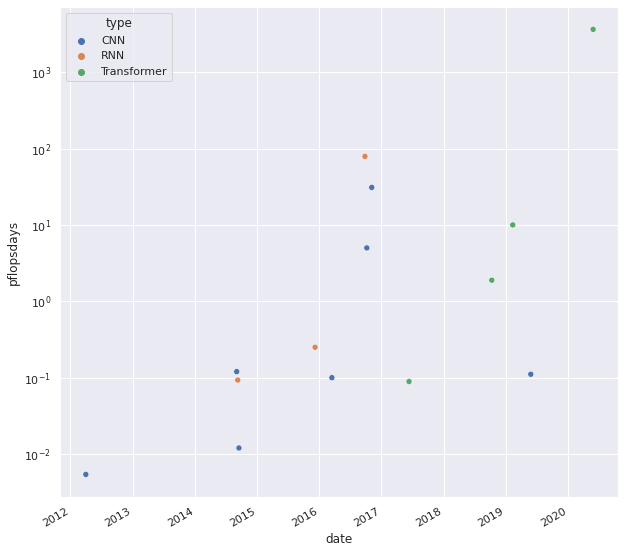

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.set(yscale="log")
fig.autofmt_xdate()
# ax.plot_date(dataframe['date'], dataframe['pflops-days'])
splot = sns.scatterplot(data=dataframe, x='date', y='pflopsdays', hue='type')
splot.set(yscale="log")

# Altair Plot

In [12]:
import altair as alt
from altair import datum

In [13]:
points=alt.Chart(dataframe, width=320, height=240).encode(
    alt.X('date:T', title='Publication Date', scale=alt.Scale(domain=[pd.to_datetime('1/1/2012', format='%d/%m/%Y'), pd.to_datetime('1/7/2021', format='%d/%m/%Y')])),
    alt.Y('pflopsdays:Q', scale=alt.Scale(type='log', base=10, zero=False), axis=alt.Axis(format='.0e'), title='Training Cost (Petaflops/s-days)'),
    alt.Color('type:N', legend=alt.Legend(orient='top-left', offset=5, fillColor='white', padding=5, strokeColor='grey', direction='horizontal', title=None, titleBaseline='middle'), title='DNN Architecture'),
    text='name:N'
).mark_circle(size=100)

annotations_nn = points.transform_filter(
    datum.type == 'NN'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 7,
)

annotations_cnn = points.transform_filter(
    datum.type == 'CNN'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 7,
)

annotations_transformer = points.transform_filter(
    datum.type == 'Transformer'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 7,
)

annotations_rnn = points.transform_filter(
    datum.type == 'RNN'
).mark_text(
    align='right',
    baseline='middle',
    fontSize = 10,
    dx = -7,
)

chart = (points+annotations_cnn+annotations_transformer+annotations_rnn).configure_axis(
    gridColor='lightgrey',
    gridOpacity=0.33,
    labelFontStyle='Roboto-Regular',
    titleFont='Roboto-Regular',
)

chart.interactive()

alt.LayerChart(...)

In [14]:
#data_years=pd.DataFrame({'year': pd.to_datetime(dataframe['date'].dt.year.unique(), format='%Y')})
data_years=pd.DataFrame({'year': pd.to_datetime(range(2012, 2022), format='%Y'), 'label': ['',]*(len(range(2012,2022))-1)+ ['Moore\'s Law']})

In [15]:
moores = alt.Chart(data_years, width=320, height=240).transform_calculate(
    moore='2500*pow(2, (year(datum.year) - 1972)/2)',
).encode(
    x=alt.X('year:T', title='Year'),
    y=alt.Y('moore:Q', axis=alt.Axis(format='.0e'), title='CPU Transistors'),
).mark_line(size=2, color='gray', strokeDash=[5])

# moores_label = alt.Chart(data_years, width=320, height=240).encode(
#     x='max(year):T',
#     y=alt.Y('moore:Q', aggregate={'argmax': 'year'}),
# ).mark_text(align='right', dx=5, text='year')
moores_label = alt.Chart(data_years, width=320, height=240).transform_calculate(
    moore='2500*pow(2, (year(datum.year) - 1972)/2)',
).encode(
    x='max(year):T',
    # y=alt.Y(field='moore:Q', aggregate={'argmax': 'year'}),
    y=alt.Y('moore:Q'),
    text='label',
).mark_text(align='right', dx=-10, dy=-7, angle=297, color='gray',)

chart = (moores+moores_label).configure_axis(
    gridColor='lightgrey',
    gridOpacity=0.33,
    labelFontStyle='Roboto-Regular',
    titleFont='Roboto-Regular',
)

chart.interactive()

alt.LayerChart(...)

In [33]:
base=alt.Chart(dataframe, width=320, height=240).transform_calculate(
    costpercent="datum.pflopsdays / 0.00540",
).encode(
    alt.X('date:T', title='Date', scale=alt.Scale(domain=[pd.to_datetime('1/4/2012', format='%d/%m/%Y'), pd.to_datetime('1/7/2021', format='%d/%m/%Y')])),
    alt.Y('costpercent:Q', axis=alt.Axis(format='.0e'), scale=alt.Scale(type='log', base=10, zero=False, padding=0)),#, title='Training Cost Ratio (relative to AlexNet)'
    text='name:N'
)

points=base.encode(
    alt.Color('type:N', legend=alt.Legend(orient='top-left', offset=5, fillColor='white', padding=5, strokeColor='grey', direction='horizontal', title=None, titleBaseline='middle'), title='DNN Architecture'),
).mark_circle(size=100)

moores = alt.Chart(data_years, width=320, height=240).transform_calculate(
    moore='2500*pow(2, (year(datum.year) - 1972)/2)',
    # moore='2621440000*pow(2, (year(datum.year) - 2012)/2)',
).transform_calculate(
    moorepercent='datum.moore/(2500*pow(2, (2012 - 1972)/2))'
).encode(
    alt.X('year:T', title='Date'),
    alt.Y('moorepercent:Q', scale=alt.Scale(type='log', base=10, zero=False), axis=alt.Axis(format='.0e'), title='Training Cost/Transistor Increase Factor'),
    text='label',
).mark_line(size=2, color='lightgray', strokeDash=[5])

moores_label = moores.mark_text(align='right', color='gray', dx=-50, dy=10, angle=350)

annotations_nn = points.transform_filter(
    datum.type == 'NN'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 7,
)

annotations_cnn = points.transform_filter(
    datum.type == 'CNN'
).mark_text(
    align='left',
    baseline='bottom',
    fontSize = 10,
    dx = 7,
)

annotations_transformer = points.transform_filter(
    datum.type == 'Transformer'
).mark_text(
    align='left',
    baseline='middle',
    fontSize = 10,
    dx = 7,
)

annotations_rnn = points.transform_filter(
    datum.type == 'RNN'
).mark_text(
    align='right',
    baseline='bottom',
    fontSize = 10,
    dx = -7,
)

chart = (
    moores+moores_label+points+annotations_cnn+annotations_transformer+annotations_rnn
).resolve_scale(y='shared').resolve_legend(shape='independent').configure_axis(
    gridColor='lightgrey',
    gridOpacity=0.33,
    labelFontStyle='Roboto-Regular',
    titleFont='Roboto-Regular',
)

chart.interactive()

alt.LayerChart(...)

In [17]:
#alt.renderers.enable('altair_saver', ['vega-lite', 'png'])
from altair_saver import save
for fmt in ['json', 'vg.json', 'html', 'png', 'svg', 'pdf']:
  save(chart, f'chart.{fmt}')
!ls -lh chart.*

WARN text dropped as it is incompatible with "line".
WARN text dropped as it is incompatible with "circle".
WARN y-scale's "zero" is dropped as it does not work with log scale.
WARN y-scale's "zero" is dropped as it does not work with log scale.
WARN y-scale's "zero" is dropped as it does not work with log scale.
WARN y-scale's "zero" is dropped as it does not work with log scale.
WARN y-scale's "zero" is dropped as it does not work with log scale.
WARN y-scale's "zero" is dropped as it does not work with log scale.


-rw-r--r-- 1 root root 6.7K Nov  7 01:37 chart.html
-rw-r--r-- 1 root root  10K Nov  7 01:37 chart.json
-rw-r--r-- 1 root root  24K Nov  7 01:37 chart.pdf
-rw-r--r-- 1 root root  29K Nov  7 01:37 chart.png
-rw-r--r-- 1 root root  45K Nov  7 01:37 chart.svg
-rw-r--r-- 1 root root  14K Nov  7 01:37 chart.vg.json


# Bokeh Plot

In [18]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import ColumnDataSource, Label, LabelSet, Plot
from bokeh.palettes import Spectral4 as colormap
from bokeh.transform import factor_cmap

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()
BOKEH_RESOURCES='inline'

In [19]:
source = ColumnDataSource(dataframe)

In [20]:
#@title Default title text
p = figure(x_axis_type="datetime", y_axis_type="log", 
           x_axis_label='Date Published',
           y_axis_label='Training Cost (Petaflops/s-days)')
p.circle(x='date', y='pflopsdays', source=source, size=8,  legend_field='type',
         color=factor_cmap('type', palette=colormap,
                           factors=['CNN', 'NN', 'RNN', 'Transformer']))
labels = LabelSet(x='date', y='pflopsdays', text='name',
                  x_offset=5, y_offset=0, source=source, text_font_size='0.8em')
p.add_layout(labels)
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

p.output_backend = "svg"
show(p)